# TEMAS SELECTOS 2

## Herramientas para el manejo de datos geoespaciales.

## Equipo 5:

### Jose Manuel Mora Balderas - 174707
### Diego Payan Jimenez - 175069

Se elaboró una notebook de Python donde se explica el funcionamiento de las herramientas (métodos, librerías, funciones, etc) de GeoPandas respecto a los métodos geométricos constructivos. Se diseñó un ejemplo práctico para ilustrar el funcionamiento de los métodos con datos provenientes del INEGI, específicamente datos del DENUE 43 (Directorio Estadístico Nacional de Unidades Económicas - Cobertura sectorial - Comercio al por mayor) de Ciudad Madero, Tamaulipas.

Los métodos principales a revisar son los siguientes:
- **Buffer:** Crea un área alrededor de una geometría a una distancia especificada.
- **Centroid:** Calcula el centroide (centro geométrico) de una figura.
- **Envolvente:** Obtiene el rectángulo (bounding box) que envuelve completamente la geometría.
- **Casco Convexo:** Determina el polígono convexo mínimo que contiene la geometría.
- **Polígono de Voronoi:** Genera regiones basadas en la distancia a un conjunto de puntos.

Posteriormente ahondaremos en más métodos de esta librería

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import  Point, Polygon, LineString, MultiPoint
from shapely.ops import voronoi_diagram
import matplotlib.pyplot as plt

#### Creación de Datos de Ejemplo

Se crea un GeoDataFrame a partir de una lista de puntos que usaremos para ilustrar cada uno de los métodos.

In [6]:
points = [Point(1, 1), Point(2, 2), Point(3, 1), Point(2, 0.5)]
gdf_points = gpd.GeoDataFrame({'geometry': points})

#### Método Buffer

##### GeoSeries.buffer(distance, resolution=16) - ejemplo del método

El método `buffer()` genera un polígono que representa un área a una distancia fija alrededor de la geometría original.  
Devuelve una serie GeoSeries de geometrías que representan todos los puntos dentro de una distancia determinada de cada objeto geométrico.

En este ejemplo, se crea un buffer de radio 1 para el punto

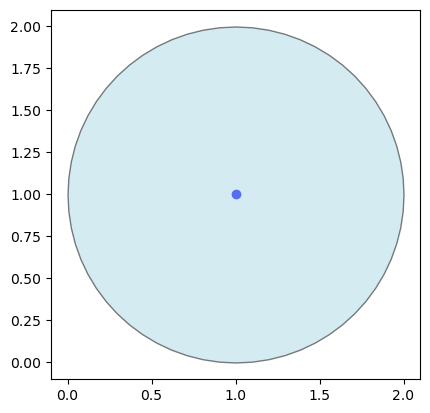

In [9]:
gseries = gpd.GeoSeries([Point(1, 1)])

buffered = gseries.buffer(1) 

fig, ax = plt.subplots()
gseries.plot(ax=ax, color='blue', marker='o', label='Punto original')
buffered.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5, label='Buffer')
plt.show()

#### GeoSeries.boundary

Devuelve una GeoSeries de objetos geométricos de menor dimensión que representan la frontera (boundary) teórica de cada geometría

0    LINESTRING (0.00000 0.00000, 2.00000 0.00000, ...
dtype: geometry


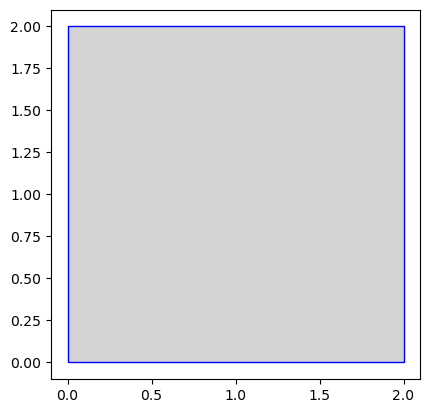

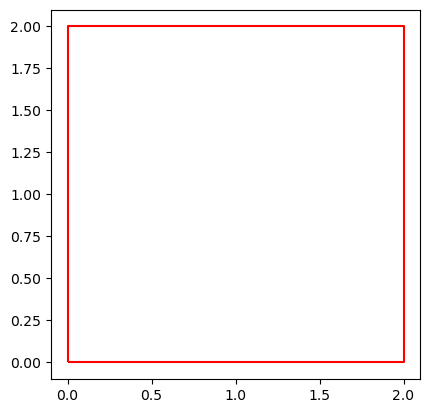

In [12]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2), (0, 0)])  # Un cuadrado
gseries = gpd.GeoSeries([polygon])

boundaries = gseries.boundary

print(boundaries)

gseries.plot(edgecolor='blue', facecolor='lightgray')
boundaries.plot(color='red')
plt.show()

#### Casco Convexo, Casco Concavo, Envolvente y Centroides

A partir de nuestros puntos se crea un objeto `MultiPoint`, del cual se calcula:
- **Casco Convexo:**

Devuelve el casco convexo de cada geometría.
Este método calcula el casco convexo, es decir, la envoltura convexa mínima que contiene a la geometría original. Es útil para simplificar formas complejas.
- **Centroides:**

Devuelve el centroide de cada geometría.
Este método calcula el punto central de una geometría, conocido como centroide. Es útil para representar la ubicación promedio de una figura geométrica.
- **Envolvente:**

Devuelve el rectángulo mínimo alineado con los ejes que encierra cada geometría.
Este método calcula el rectángulo delimitador mínimo que contiene a la geometría original, alineado con los ejes coordenados. Es útil para obtener límites simples de una figura.

In [15]:
# Crear un MultiPoint a partir de la lista de puntos
multipoint = MultiPoint(points)

# Calcular el casco convexo (convex hull)
convex_hull = multipoint.convex_hull

# Calcular el centroide del casco convexo
centroid = convex_hull.centroid

# Calcular la envolvente del casco convexo (bounding box)
envelope = convex_hull.envelope

- **Diagrama de Voronoi:**

El diagrama de Voronoi divide el espacio en regiones donde cada región contiene todos los puntos más cercanos a uno de los puntos generadores.  
Utilizamos la función `voronoi_diagram()` de Shapely para generar este diagrama a partir del conjunto de puntos.

In [18]:
# Generar el diagrama de Voronoi a partir del MultiPoint
voronoi_geom = voronoi_diagram(multipoint)

# Extraer los polígonos del diagrama (la función devuelve un GeometryCollection)
voronoi_polys = list(voronoi_geom.geoms)

# Crear un GeoDataFrame para los polígonos de Voronoi
gdf_voronoi = gpd.GeoDataFrame({'geometry': voronoi_polys})

- **Visualización de los Resultados:**


Se muestran en un conjunto de gráficos los resultados de cada operación:
- **Puntos originales**
- **Buffers**
- **Casco Convexo**
- **Centroide del Casco Convexo**
- **Envolvente del Casco Convexo**
- **Diagrama de Voronoi**

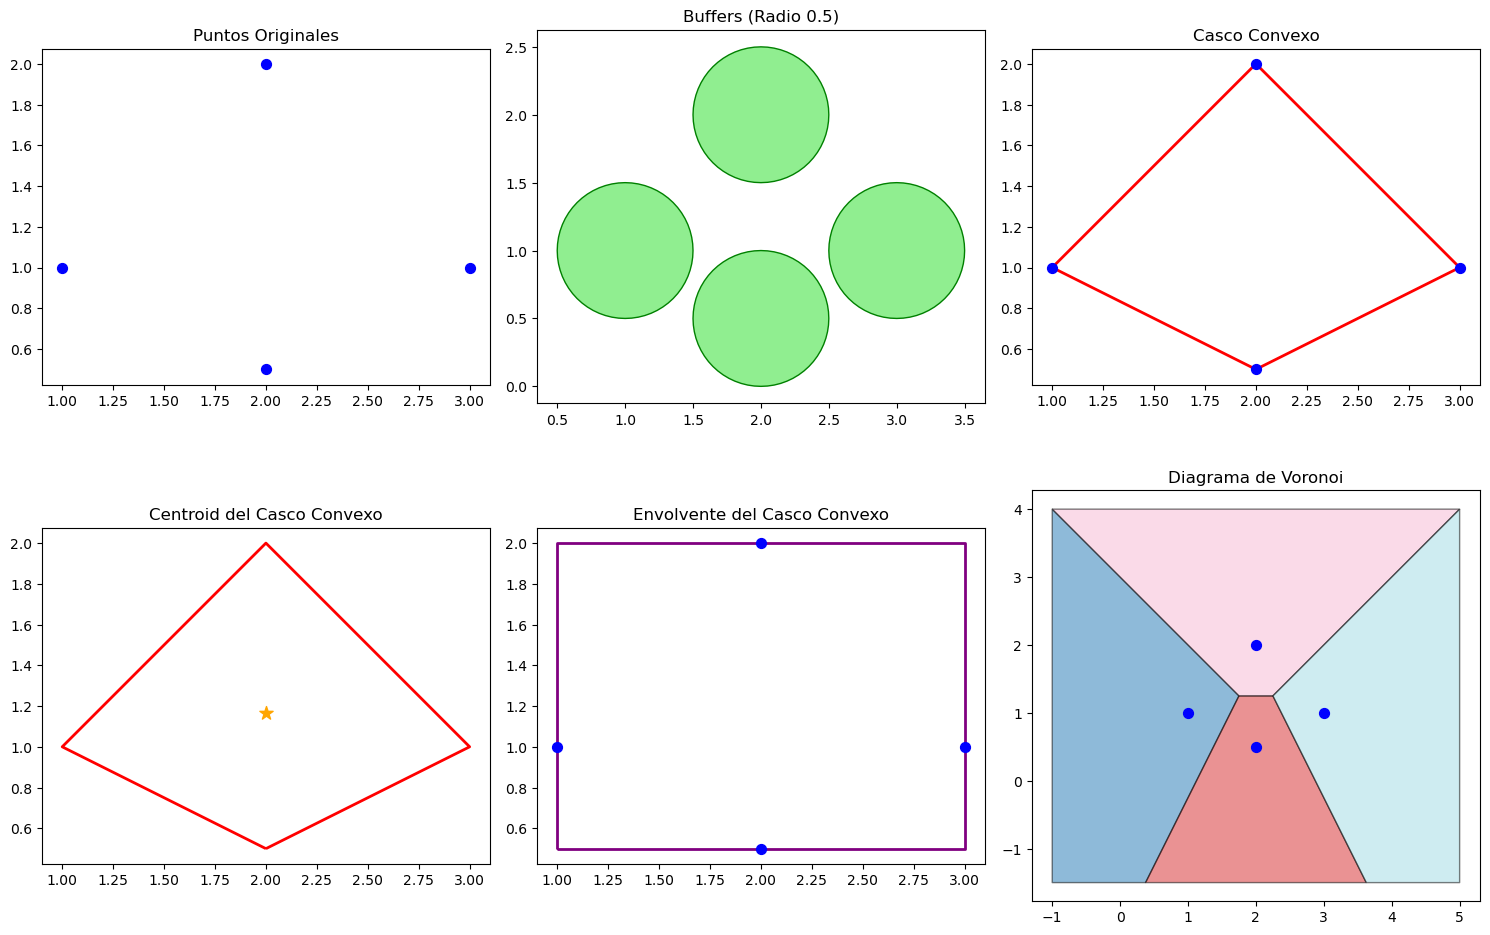

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

gdf_points['buffer'] = gdf_points.geometry.buffer(0.5)

# Puntos originales
gdf_points.plot(ax=ax[0, 0], color='blue', marker='o', markersize=50)
ax[0, 0].set_title("Puntos Originales")

# Buffers (se usa la columna 'buffer')
gdf_points.set_geometry('buffer').plot(ax=ax[0, 1], color='lightgreen', edgecolor='green')
ax[0, 1].set_title("Buffers (Radio 0.5)")

# Casco Convexo
gpd.GeoSeries(convex_hull).plot(ax=ax[0, 2], color='none', edgecolor='red', linewidth=2)
gdf_points.set_geometry('geometry').plot(ax=ax[0, 2], color='blue', marker='o', markersize=50)
ax[0, 2].set_title("Casco Convexo")

# Centroid del Casco Convexo
gpd.GeoSeries(convex_hull).plot(ax=ax[1, 0], color='none', edgecolor='red', linewidth=2)
gpd.GeoSeries(centroid).plot(ax=ax[1, 0], color='orange', marker='*', markersize=100)
ax[1, 0].set_title("Centroid del Casco Convexo")

# Envolvente del Casco Convexo
gpd.GeoSeries(envelope).plot(ax=ax[1, 1], color='none', edgecolor='purple', linewidth=2)
gdf_points.set_geometry('geometry').plot(ax=ax[1, 1], color='blue', marker='o', markersize=50)
ax[1, 1].set_title("Envolvente del Casco Convexo")

# Diagrama de Voronoi
gdf_voronoi.plot(ax=ax[1, 2], cmap='tab20', edgecolor='black', alpha=0.5)
gdf_points.set_geometry('geometry').plot(ax=ax[1, 2], color='blue', marker='o', markersize=50)
ax[1, 2].set_title("Diagrama de Voronoi")

plt.tight_layout()
plt.show()

In [23]:
# Datos de prueba
point = Point(1, 1)
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
line = LineString([(0, 0), (1, 1), (2, 0)])
points = MultiPoint([(0, 0), (1, 2), (2, 1), (0.5, 1.5), (1.5, 0.5)])

gseries = gpd.GeoSeries([point, polygon, line, points])

#### GeoSeries.concave_hull

Devuelve una GeoSeries de geometrías representando el menor polígono cóncavo que contiene todos los puntos en cada objeto. A diferencia del casco convexo, el casco cóncavo sigue más de cerca la forma original, permitiendo indentaciones.

In [26]:
gseries_concave_hull = gseries.apply(lambda geom: geom.convex_hull if geom.geom_type != 'Point' else geom)

#### GeoSeries.delaunay_triangles
Devuelve una GeoSeries que consiste en polígonos (por defecto) o LineStrings (only_edges=True) que representan la triangulación de Delaunay. La triangulación de Delaunay subdivide un conjunto de puntos en triángulos de forma que no haya puntos dentro del círculo circunscrito de ningún triángulo.


In [29]:
gseries_delaunay = gseries.delaunay_triangles()


#### GeoSeries.extract_unique_points
Devuelve una GeoSeries con todos los puntos únicos que forman parte de cada geometría. Este método extrae los vértices únicos de una geometría y los devuelve como una colección de puntos.

In [32]:
gseries_unique_points = gseries.extract_unique_points()

#### GeoSeries.offset_curve
Devuelve una GeoSeries de líneas desplazadas a una distancia específica de la geometría original. Solo funciona con líneas y crea versiones desplazadas a un lado u otro de la línea original.


In [35]:
gseries_offset_curve = gseries[gseries.geom_type == 'LineString'].offset_curve(0.2)

#### GeoSeries.simplify
Devuelve una GeoSeries con representaciones simplificadas de cada geometría según una tolerancia. Reduce el número de vértices en una geometría manteniendo su forma general.

In [38]:
gseries_simplified = gseries.simplify(0.1)

#### GeoSeries.affine_transform
Aplica una transformación afín a las geometrías en la GeoSeries. Permite escalar, rotar, trasladar y sesgar geometrías con una matriz de transformación.


In [41]:
gseries_transformed = gseries.affine_transform([1, 0, 0, 1, 2, 2])

#### GeoSeries.rotate
Rota las geometrías de la GeoSeries en un ángulo determinado. Se puede especificar el origen de la rotación y si el ángulo está en radianes o grados.

In [44]:
gseries_rotated = gseries.rotate(45)

#### GeoSeries.scale
Escala las geometrías de la GeoSeries a lo largo de los ejes X, Y y Z. Permite agrandar o reducir una geometría en proporciones específicas.

In [47]:
gseries_scaled = gseries.scale(2, 2)

#### GeoSeries.skew
Aplica un sesgado a las geometrías de la GeoSeries en los ejes X e Y. Este método inclina una geometría en un ángulo determinado en cada eje.

In [50]:
gseries_skewed = gseries.skew(30, 15)

#### GeoSeries.translate
Traslada las geometrías de la GeoSeries en X, Y y Z. Permite mover una geometría a otra posición manteniendo su forma original.

In [53]:
gseries_translated = gseries.translate(3, 3)

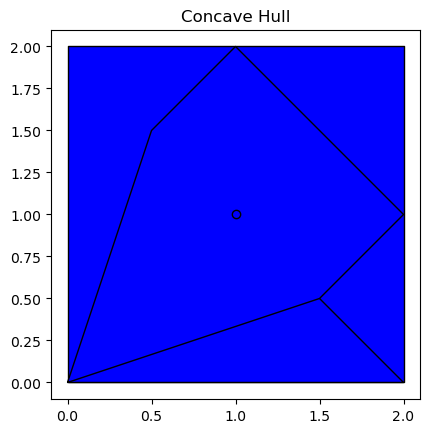

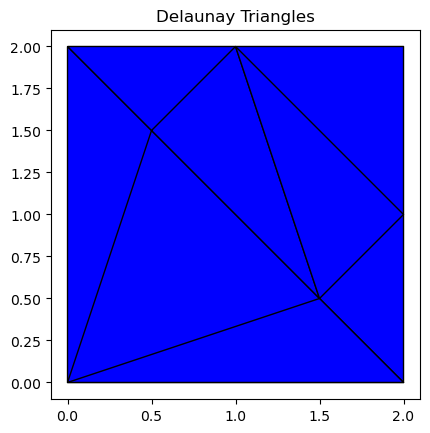

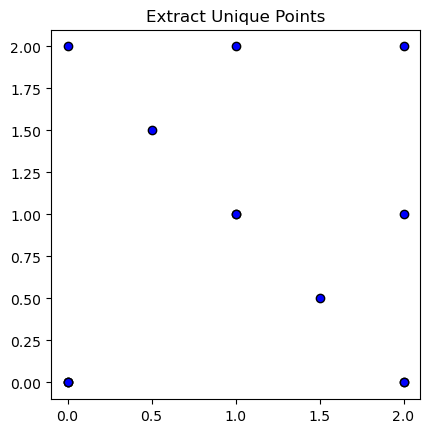

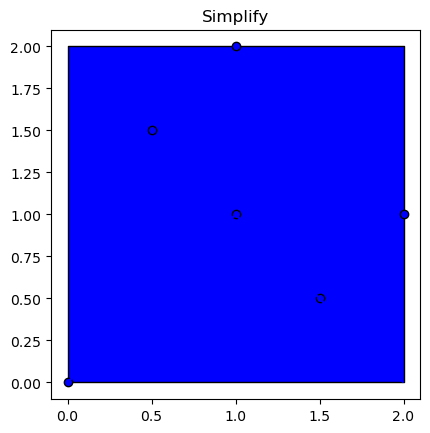

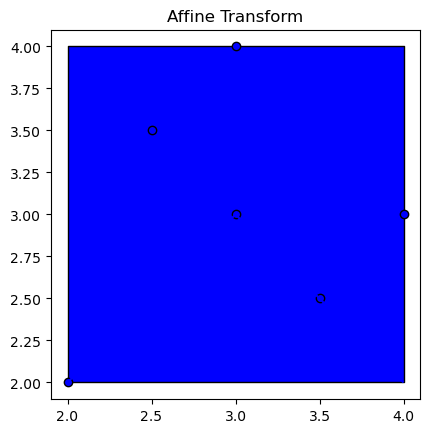

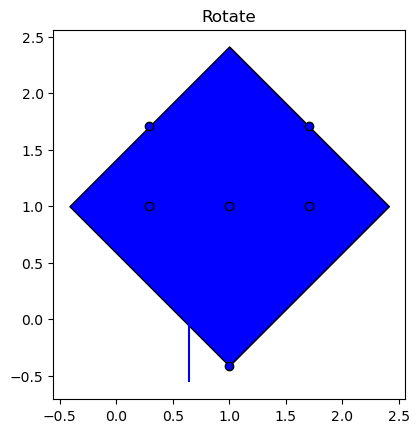

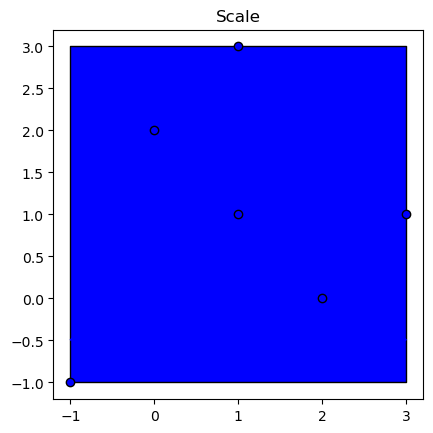

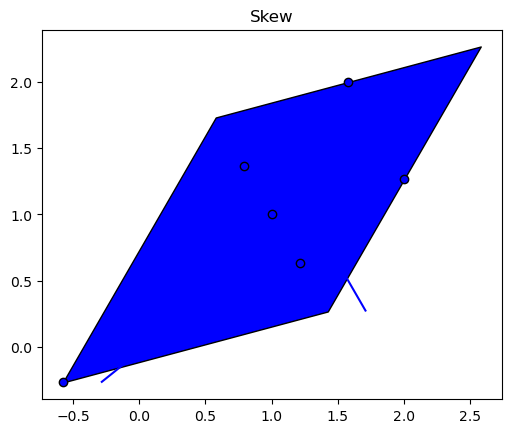

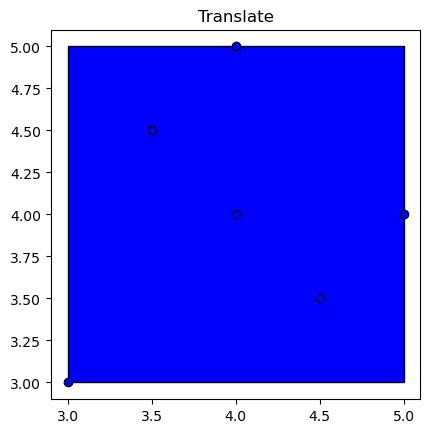

In [55]:
# Visualización
def plot_geoseries(title, gseries):
    fig, ax = plt.subplots()
    gseries.plot(ax=ax, color='blue', edgecolor='black')
    plt.title(title)
    plt.show()

plot_geoseries("Concave Hull", gseries_concave_hull)
plot_geoseries("Delaunay Triangles", gseries_delaunay)
plot_geoseries("Extract Unique Points", gseries_unique_points)
plot_geoseries("Simplify", gseries_simplified)
plot_geoseries("Affine Transform", gseries_transformed)
plot_geoseries("Rotate", gseries_rotated)
plot_geoseries("Scale", gseries_scaled)
plot_geoseries("Skew", gseries_skewed)
plot_geoseries("Translate", gseries_translated)

## Ejemplo práctico: 
#### Análisis centrado en la actividad económica y la ubicación de establecimientos en Ciudad Madero

Se utiliza el archivo DENUE 43, que contiene datos puntuales de unidades económicas en Ciudad Madero, Tamaulipas.

- Después de cargar el archivo en formato GPKG, se forzó el CRS a EPSG:4326 (WGS84) y se transformó a un sistema proyectado (EPSG:32614, UTM zona 14N) para asegurar que las distancias (por ejemplo, buffers de 500 m) se calculen en metros.
  
- Se generaron buffers de 500 metros alrededor de cada establecimiento para identificar áreas de influencia, lo que permite evaluar la accesibilidad y la concentración de la actividad económica.

- Además, se calculó el casco convexo de todos los puntos para determinar la extensión mínima que abarca la totalidad de los establecimientos, junto con su centroide y envolvente.

- Finalmente, se implementó un diagrama de Voronoi recortado al área de análisis (utilizando el casco convexo) para delimitar regiones de influencia basadas en la cercanía a cada establecimiento, lo que ayuda a visualizar las áreas con mayor concentración de negocios.

In [58]:
ruta_gpkg = r"C:\Users\josem\Temas 2 - Datos Geoespaciales\DENUE 43 - Ciudad Madero - Tamaulipas.gpkg"

gdf_denue = gpd.read_file(ruta_gpkg)
print("CRS inicial de los datos:", gdf_denue.crs)
print(gdf_denue.head())

if not gdf_denue.crs or "degree" in gdf_denue.crs.to_string().lower():
    gdf_denue = gdf_denue.set_crs(epsg=4326, allow_override=True)
    print("Se ha forzado el CRS a EPSG:4326 (WGS84).")

gdf_denue = gdf_denue.to_crs(epsg=32614)
print("CRS transformado:", gdf_denue.crs)
print(gdf_denue.head())

CRS inicial de los datos: GEOGCS["WGS 84 (CRS84)",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH],AUTHORITY["OGC","CRS84"]]
         id                          clee                     nom_estab  \
0   9891988  28009435319000091000000000S7                        AIREII   
1  10354046  28009434311000221000000000U8             AM CONSIGNACIONES   
2   9429055  28009437112000021000000000U1  AUDIOTEL GLOBAL COMUNICATIOS   
3   4104484  28009434211000101000000000U4     BA�OS Y CONEXIONES MADERO   
4   7396035  28009434211000492000000000U7               BLOQUERA MAROSO   

                                    raz_social  codigo_act  \
0  REPRESENTACIONES INTEGRALES AIREII SA DE CV      435319   
1                                          NaN      434311   
2        AUDIOTEL GLOBAL COMUNICATIOS SA DE CV      437312   
3                                      

#### Buffers (500 m)
Se generan buffers de 500 metros alrededor de cada unidad económica para identificar sus zonas de influencia.

In [61]:
gdf_denue["buffer"] = gdf_denue.geometry.buffer(500)

### **Casco Convexo, Centroides y Envolvente**

- **Casco Convexo (Convex Hull):**

Calcula el polígono convexo mínimo que contiene todas las unidades económicas.
- **Centroides:**


Obtiene el punto central del casco convexo.

- **Envolvente (Envelope):** 

Determina el rectángulo mínimo que envuelve el casco convexo.

In [64]:
multipoint_denue = MultiPoint(gdf_denue.geometry.tolist())
convex_hull_denue = multipoint_denue.convex_hull
centroid_denue = convex_hull_denue.centroid
envelope_denue = convex_hull_denue.envelope


#### **Diagrama de Voronoi**

Se genera el diagrama de Voronoi a partir de las ubicaciones de los establecimientos y se recorta al casco convexo para limitar su extensión y mejorar la visualización.

In [67]:
voronoi_geom_denue = voronoi_diagram(multipoint_denue)
voronoi_polys_denue = list(voronoi_geom_denue.geoms)

gdf_voronoi_denue = gpd.GeoDataFrame({'geometry': voronoi_polys_denue}, crs=gdf_denue.crs)

# Recortar el Voronoi al casco convexo para obtener solo las regiones de interés
gdf_voronoi_denue = gpd.clip(gdf_voronoi_denue, convex_hull_denue)


#### **Visualización de Resultados**

A continuación se presentan seis gráficos:

1. **Unidades Económicas (DENUE 43):** Visualización de los establecimientos.
2. **Buffers de 500 m:** Zonas de influencia alrededor de cada establecimiento.
3. **Casco Convexo:** Polígono que contiene todos los establecimientos.
4. **Centroid del Casco Convexo:** Punto central del área analizada.
5. **Envolvente (Envelope):** Rectángulo mínimo que encierra el casco convexo.
6. **Diagrama de Voronoi:** Regiones de influencia basadas en la cercanía a cada establecimiento, recortado al área de análisis.

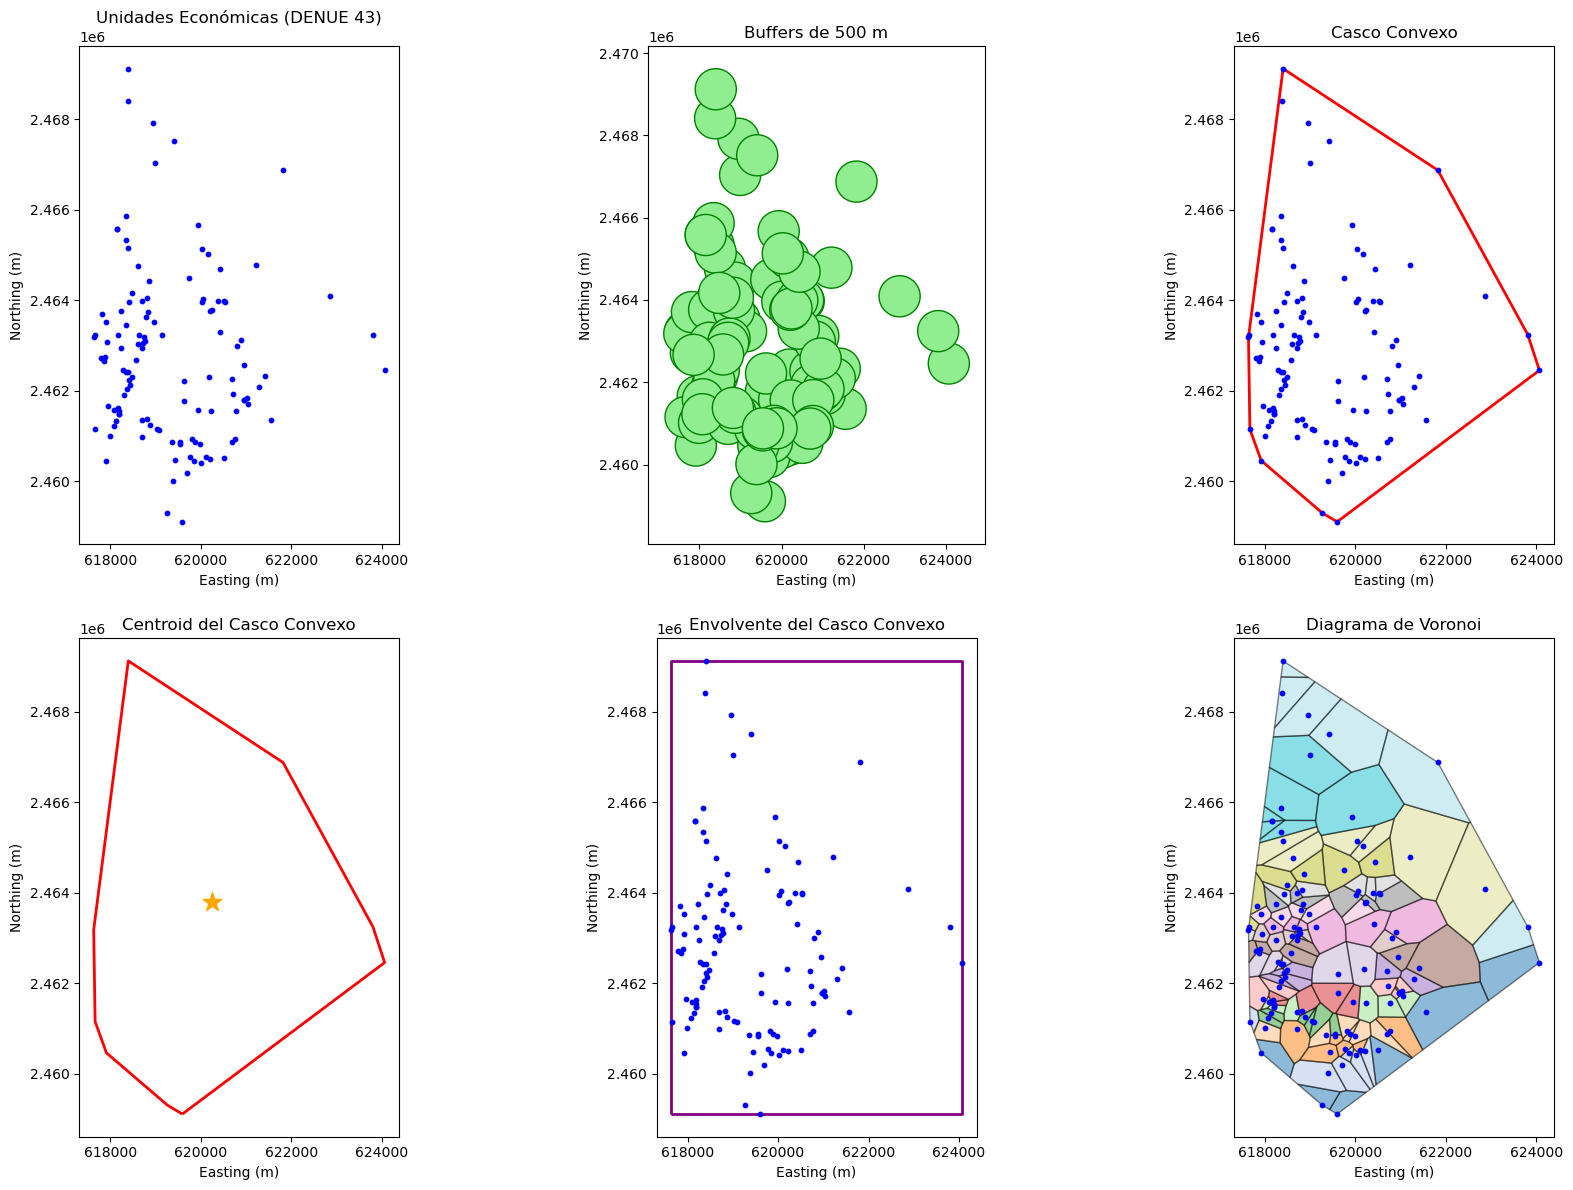

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# 1. Unidades Económicas (DENUE 43)
gdf_denue.plot(ax=ax[0, 0], color='blue', markersize=10)
ax[0, 0].set_title("Unidades Económicas (DENUE 43)")

# 2. Buffers de 500 m
gdf_denue.set_geometry('buffer').plot(ax=ax[0, 1], color='lightgreen', edgecolor='green')
ax[0, 1].set_title("Buffers de 500 m")

# 3. Casco Convexo
gpd.GeoSeries(convex_hull_denue).plot(ax=ax[0, 2], color='none', edgecolor='red', linewidth=2)
gdf_denue.set_geometry('geometry').plot(ax=ax[0, 2], color='blue', markersize=10)
ax[0, 2].set_title("Casco Convexo")

# 4. Centroid del Casco Convexo
gpd.GeoSeries(convex_hull_denue).plot(ax=ax[1, 0], color='none', edgecolor='red', linewidth=2)
gpd.GeoSeries(centroid_denue).plot(ax=ax[1, 0], color='orange', marker='*', markersize=200)
ax[1, 0].set_title("Centroid del Casco Convexo")

# 5. Envolvente (Envelope)
gpd.GeoSeries(envelope_denue).plot(ax=ax[1, 1], color='none', edgecolor='purple', linewidth=2)
gdf_denue.set_geometry('geometry').plot(ax=ax[1, 1], color='blue', markersize=10)
ax[1, 1].set_title("Envolvente del Casco Convexo")

# 6. Diagrama de Voronoi (recortado al casco convexo)
gdf_voronoi_denue.plot(ax=ax[1, 2], cmap='tab20', edgecolor='black', alpha=0.5)
gdf_denue.set_geometry('geometry').plot(ax=ax[1, 2], color='blue', markersize=10)
ax[1, 2].set_title("Diagrama de Voronoi")

# Ajustar la relación de aspecto y etiquetas de los ejes en cada subplot
for row in ax:
    for col in row:
        col.set_aspect('equal')
        col.set_xlabel("Easting (m)")
        col.set_ylabel("Northing (m)")

plt.tight_layout()
plt.show()

El eje horizontal son las coordenadas de posición este/oeste en metros.

El eje vertical los valores representan la posición norte en metros desde el ecuador.

#### **Conclusiones**

En este notebook se ilustraron dos enfoques para comprender y aplicar las herramientas geométricas de GeoPandas:

#### 1. **Ejemplos Inmediatos:**

   - Se crearon algunos puntos simples para demostrar de forma clara los métodos de buffer, casco convexo, centroid, envolvente y diagrama de Voronoi, así como más métodos de la librería.

   - Esta parte sirvió para mostrar cómo funciona cada operación geométrica en un entorno controlado y fácil de visualizar.

#### 2. **Aplicación a Datos Reales (DENUE 43):**

   - Se utilizó la información de unidades económicas en Ciudad Madero, proveniente del archivo **DENUE 43 - Ciudad Madero - Tamaulipas.gpkg**.

   - Se forzó el CRS a EPSG:4326 y se transformó a un sistema proyectado (EPSG:32614) para trabajar en metros, asegurando que los métodos como `buffer(500)` y `voronoi_diagram` reflejen distancias reales.

   - Se generó un análisis espacial que incluyó la creación de buffers de 500 m alrededor de cada establecimiento, el cálculo del casco convexo (para observar la extensión mínima de la actividad económica), el centroide y la envolvente, así como el diagrama de Voronoi recortado para una mejor interpretación de las zonas de influencia.

#### **Conclusión General:**

- Con una correcta proyección de los datos, las operaciones geométricas se comportan de manera coherente con la realidad, permitiendo medir distancias en metros y visualizar adecuadamente la distribución de las unidades económicas.

- Los ejemplos inmediatos ofrecen una base conceptual sencilla, mientras que la aplicación del DENUE 43 de Ciudad Madero demuestra cómo estos métodos pueden emplearse para estudios de accesibilidad, planificación urbana y análisis de la concentración de la actividad económica.

- GeoPandas proporciona un entorno potente para el análisis espacial, siempre y cuando se preste especial atención al sistema de referencia de coordenadas (CRS) y a la interpretación correcta de las distancias en el mapa.